In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_ab_bins(grid_size=16):
    a_range = torch.arange(-128, 128, grid_size)
    b_range = torch.arange(-128, 128, grid_size)
    ab_bins = torch.tensor([[a, b] for a in a_range for b in b_range])

    return ab_bins

In [3]:
ab_bins = create_ab_bins(16)
ab_bins

tensor([[-128, -128],
        [-128, -112],
        [-128,  -96],
        [-128,  -80],
        [-128,  -64],
        [-128,  -48],
        [-128,  -32],
        [-128,  -16],
        [-128,    0],
        [-128,   16],
        [-128,   32],
        [-128,   48],
        [-128,   64],
        [-128,   80],
        [-128,   96],
        [-128,  112],
        [-112, -128],
        [-112, -112],
        [-112,  -96],
        [-112,  -80],
        [-112,  -64],
        [-112,  -48],
        [-112,  -32],
        [-112,  -16],
        [-112,    0],
        [-112,   16],
        [-112,   32],
        [-112,   48],
        [-112,   64],
        [-112,   80],
        [-112,   96],
        [-112,  112],
        [ -96, -128],
        [ -96, -112],
        [ -96,  -96],
        [ -96,  -80],
        [ -96,  -64],
        [ -96,  -48],
        [ -96,  -32],
        [ -96,  -16],
        [ -96,    0],
        [ -96,   16],
        [ -96,   32],
        [ -96,   48],
        [ -96,   64],
        [ 

In [4]:
ab_bins.shape

torch.Size([256, 2])

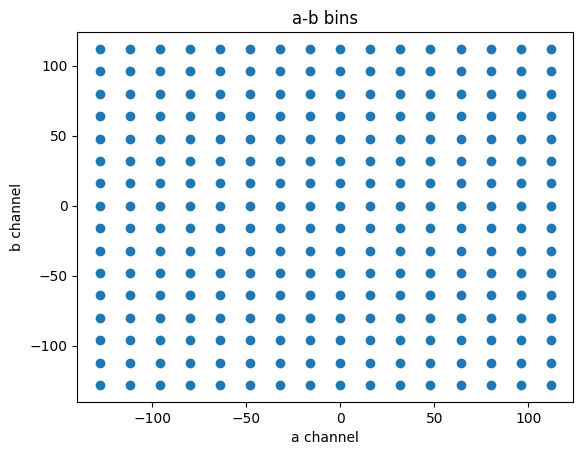

In [5]:
plt.plot(ab_bins[:, 0], ab_bins[:, 1], 'o')
plt.xlabel('a channel')
plt.ylabel('b channel')
plt.title('a-b bins')
plt.show();

In [6]:
def k_nearest_neighbours(ab_target, ab_reference, k=5):
    """
    Find the k nearest neighbors in the ab color space to a target point.

    Parameters:
    ----------
    ab_target : torch.Tensor
        Target point in the form of (a, b).

    ab_reference : torch.Tensor
        Reference points, shape (n, 2).

    k : int, optional
        Number of nearest neighbors to find (default is 5).

    Returns:
    -------
    torch.Tensor
        k nearest points in the ab color space.

    torch.Tensor
        Distances of the k nearest points from the target.
    """
     
    distances = torch.linalg.norm(ab_reference - ab_target, dim=1)
    k_distances = torch.argsort(distances)[:k]
    return k_distances, distances[k_distances]

def gaussian_encoding(ab_target, ab_reference, std_dev=5.0):
    """
    Calculate Gaussian weights for ab_reference based on distance to ab_target.

    Parameters:
    ----------
    ab_target : torch.Tensor
        Target point in the form of (a, b).

    ab_reference : torch.Tensor
        Reference points, shape (n, 2).

    std_dev : float, optional
        Standard deviation for the Gaussian distribution (default is 5.0).

    Returns:
    -------
    torch.Tensor
        Normalized Gaussian weights for each reference point.
    """
    
    distances = torch.linalg.norm(ab_reference - ab_target, dim=1)
    weights = torch.exp(-0.5 * (distances / std_dev) ** 2)
    soft_weights = weights / torch.sum(weights)
    return soft_weights

In [7]:
torch.manual_seed(42)
ab_target = torch.randint(-128, 128, (2,), dtype=torch.float32)
soft_encoded_weights = gaussian_encoding(ab_target, ab_bins)
soft_encoded_weights

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 4.2459e-43, 1.8217e-44, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.9874e-36, 6.3518e-29, 7.2499e-26,
        2.9552e-27, 4.3020e-33, 2.2281e-43, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.3556e-35, 1.2132e-23, 3.8773e-

In [8]:
print(f'Sum of weights: {soft_encoded_weights.sum():.4f}')
print(f'Max weight: {soft_encoded_weights.max():.4f}')
print(f'Min weight: {soft_encoded_weights.min():.4f}')
print(f'Soft Encoded Weights\' shape: {soft_encoded_weights.shape}')

Sum of weights: 1.0000
Max weight: 0.7511
Min weight: 0.0000
Soft Encoded Weights' shape: torch.Size([256])


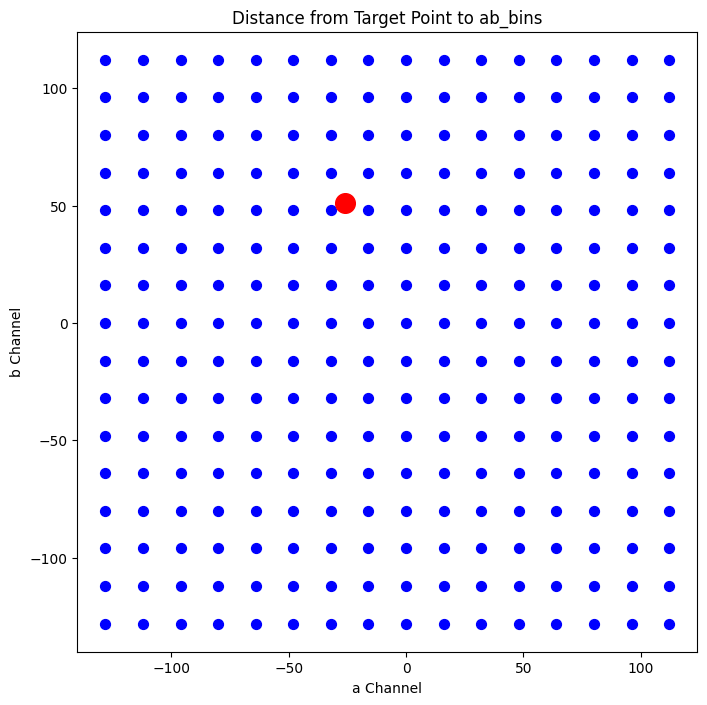

In [9]:
plt.figure(figsize=(8, 16))
plt.scatter(ab_bins[:, 0], ab_bins[:, 1], color='blue', s=50)
plt.scatter(ab_target[0], ab_target[1], color='red', s=200)
# for i in range(len(ab_bins)):
#     plt.plot([ab_target[0], ab_bins[i, 0]], [ab_target[1], ab_bins[i, 1]], color='gray', linestyle='--')
plt.title('Distance from Target Point to ab_bins')
plt.xlabel('a Channel')
plt.ylabel('b Channel')
plt.gca().set_aspect('equal', adjustable='box')
plt.show();